# NLP Classification & Sentiment Analysis (Bacchanal Buffet)

Bu çalışmanın amacı; metinlerden duygu analizi (sentiment analysis) yapmaktır. 
Çalışmada veri temizleme, özellik çıkarımı (vektörizasyon) ve makine öğrenmesi modelleri uygulanarak 
farklı yöntemlerin doğruluk, precision, recall ve F1 gibi metrikler üzerindeki etkisi değerlendirilecektir. 
Projenin temel hedefi, Bacchanal Buffet’in sunduğu hizmetleri müşteri geri bildirimleri üzerinden analiz ederek hizmet kalitesini geliştirmek ve müşteri memnuniyetini artırmaktır. Bu kapsamda, müşteri yorumları doğal dil işleme teknikleriyle incelenmektedir.

**Hedefler:**
- Veri setini tanıtmak ve sınıf dağılımını göstermek
- Metin ön işleme adımlarını açıklamak
- Özellik çıkarımı (CountVectorizer/TF-IDF) yöntemlerini uygulamak
- Temel modellerden bazılarını (Naive Bayes, Lojistik Regresyon, SVM vb.) eğitmek
- Sonuçları kıyaslamak

<img src=https://images.squarespace-cdn.com/content/v1/560dbc25e4b0969564758eb5/1469474609341-T6WDBRNFC6ZCOW5FVKNQ/Bacchanal+croissants+www.thetravelpockets.com, width=600>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('restaurant.csv')

In [3]:
df.head(3)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09


In [4]:
df.shape

(10417, 10)

In [5]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [6]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [8]:
df.corr(numeric_only=True)

,Unnamed: 0,stars,useful,funny,cool
Unnamed: 0,1.000000,0.014974,0.082662,0.064830,0.071627
stars,0.014974,1.000000,0.009373,0.019756,0.049066
useful,0.082662,0.009373,1.000000,0.917116,0.947522
funny,0.064830,0.019756,0.917116,1.000000,0.946281
cool,0.071627,0.049066,0.947522,0.946281,1.000000


In [9]:
df = df.drop(columns=["Unnamed: 0", "review_id", "user_id", "business_id"]) #gerekmez olduklarını düşündüğümüz için sildik

In [10]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day#tarihleri düzeltmek için

In [11]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
df['text']  = df['text'].astype(str)
df = df.dropna(subset=['text','stars']).reset_index(drop=True)

In [12]:
df.head()

,stars,useful,funny,cool,text,date,year,month,day
0,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,2012,12,4
1,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,2014,1,17
2,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,2015,6,8
3,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,2016,12,19
4,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,2015,7,28


## Keşifsel Veri Analizi (EDA)

Bu bölüm ve ön işlemenin altında veri hakkında görsel ve sayısal keşif yapılır:
- Sınıf dağılım grafiği
- Sık kullanılan kelimeler (WordCloud)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

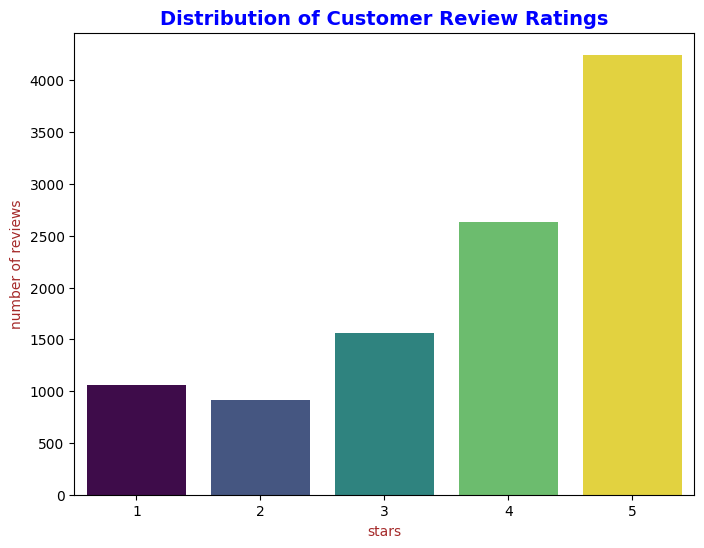

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x="stars", hue="stars", data=df, palette="viridis", legend=False)

plt.title("Distribution of Customer Review Ratings", fontsize=14, fontweight="bold", color="blue")
plt.xlabel("stars", color="brown")
plt.ylabel("number of reviews", color="brown")

plt.show()

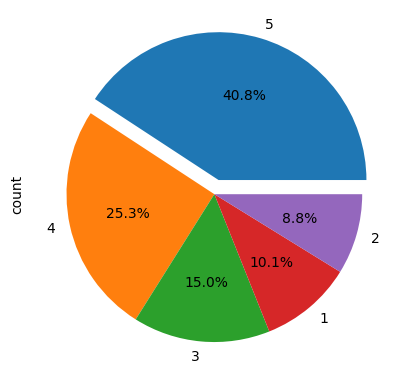

In [16]:
df['stars'].value_counts().plot.pie(autopct="%1.1f%%", explode=[0.1,0,0,0,0]);

## Veri Ön İşleme

Bu bölümde metinler üzerinde aşağıdaki adımlar uygulanır:
- Küçük harfe çevirme
- Noktalama işaretlerini, emojileri ve özel karakterleri temizleme
- Stopwords çıkarma
- Lemmatization/stemming
- Dil tespiti ve yabancı dil filtreleme

In [18]:
%pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
from langdetect import detect
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [20]:
import neattext.functions as nfx

In [21]:
df['clean_text'] = (df['text'].apply(nfx.remove_emojis).apply(nfx.remove_special_characters).apply(nfx.remove_punctuations).str.lower())

In [22]:
df['clean_text']

0        after getting food poisoning at the palms hote...
1        a feast worthy of godsbaccarnal buffet in caes...
2        the crab legs are better than the ones at wick...
3        not worth it too salty food and expensive this...
4        i would give this infinite stars if i could my...
                               ...                        
10412    best buffet ever irma was great served us bett...
10413    hollllllyyyy moleyyyy this buffet was one for ...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets ive had in vegas my on...
10416    i got a chance to go to the bacchanal buffett ...
Name: clean_text, Length: 10417, dtype: object

In [23]:
df["clean_text"] = df["clean_text"].apply(lambda s: word_tokenize(str(s))) #kelimeleri bölüyoruz

In [24]:
stop_words = set(stopwords.words("english"))
df["clean_text"] = df["clean_text"].apply(lambda t: [w for w in t if w.lower() not in stop_words]) #gerekmez kelime kaldırması

In [25]:
df["clean_text"]

0        [getting, food, poisoning, palms, hotel, scare...
1        [feast, worthy, godsbaccarnal, buffet, caesar,...
2        [crab, legs, better, ones, wicked, spoon, huge...
3        [worth, salty, food, expensive, furst, kast, v...
4        [would, give, infinite, stars, could, family, ...
                               ...                        
10412    [best, buffet, ever, irma, great, served, us, ...
10413    [hollllllyyyy, moleyyyy, buffet, one, books, i...
10414    [selection, amazing, food, excellently, prepar...
10415    [one, best, buffets, ive, vegas, visit, unfort...
10416    [got, chance, go, bacchanal, buffett, last, tu...
Name: clean_text, Length: 10417, dtype: object

In [26]:
def wn_pos(tag: str):
    if not tag: 
        return wordnet.NOUN
    m = tag[0]
    return {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN,
        'R': wordnet.ADV,
    }.get(m, wordnet.NOUN)

In [27]:
lemm = WordNetLemmatizer()

def lemmatize_with_pos(tokens):
    tagged = pos_tag(tokens)
    return [lemm.lemmatize(w, wn_pos(t)) for w, t in tagged] #kökünü bulmak

In [28]:
df["clean_text"] = df["clean_text"].apply(lemmatize_with_pos)
df["clean_text"] = df["clean_text"].apply(lambda t: " ".join(t))

In [29]:
df["clean_text"]

0        get food poison palm hotel scar eat buffet fig...
1        feast worthy godsbaccarnal buffet caesar palac...
2        crab leg well one wicked spoon huge prawn shee...
3        worth salty food expensive furst kast visit bu...
4        would give infinite star could family diamond ...
                               ...                        
10412    best buffet ever irma great serve u good place...
10413    hollllllyyyy moleyyyy buffet one book iv never...
10414    selection amaze food excellently prepare esmer...
10415    one best buffet ive vega visit unfortunately m...
10416    get chance go bacchanal buffett last tuesday c...
Name: clean_text, Length: 10417, dtype: object

In [30]:
df["language"] = df["text"].apply(lambda x: detect(str(x)))

In [31]:
df = df[df['language'] == 'en'].copy()

In [32]:
df.loc[df["stars"] >= 4, "sentiment"] = "positive" 
df.loc[df["stars"] <= 2, "sentiment"] = "negative" 
df.loc[df["stars"] == 3, "sentiment"] = "neutral"

In [33]:
df.head()

,stars,useful,funny,cool,text,date,year,month,day,clean_text,language,sentiment
0,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,2012,12,4,get food poison palm hotel scar eat buffet fig...,en,positive
1,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,2014,1,17,feast worthy godsbaccarnal buffet caesar palac...,en,positive
2,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,2015,6,8,crab leg well one wicked spoon huge prawn shee...,en,positive
3,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,2016,12,19,worth salty food expensive furst kast visit bu...,en,negative
4,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,2015,7,28,would give infinite star could family diamond ...,en,positive


In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [35]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [36]:
text = " ".join(df[df['sentiment']=='positive']['clean_text'])

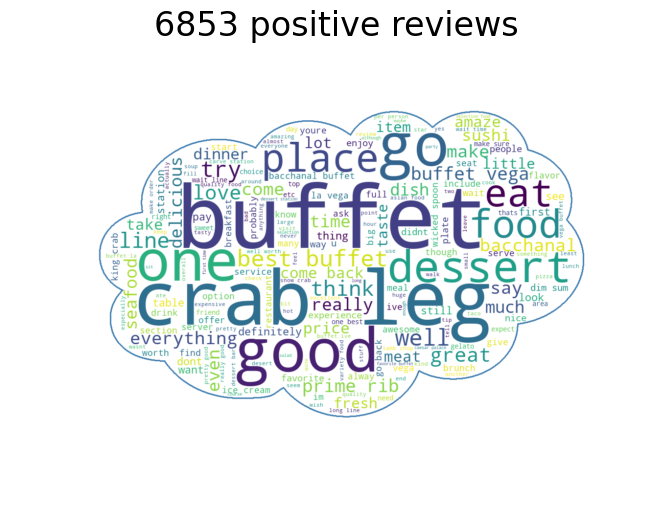

In [37]:
mask = np.array(Image.open("cloud.png"))
wc = WordCloud(width=600, height=600, background_color="white", stopwords=STOPWORDS, mask=mask, contour_width=3, contour_color="steelblue").generate(text)

plt.figure(figsize=(10,6)); 
plt.title(f"{(df['sentiment']=='positive').sum()} positive reviews", fontsize=24);
plt.imshow(wc, interpolation='bilinear'); 
plt.axis('off'); 
plt.show()

In [38]:
text = " ".join(df[df['sentiment']=='negative']['clean_text'])

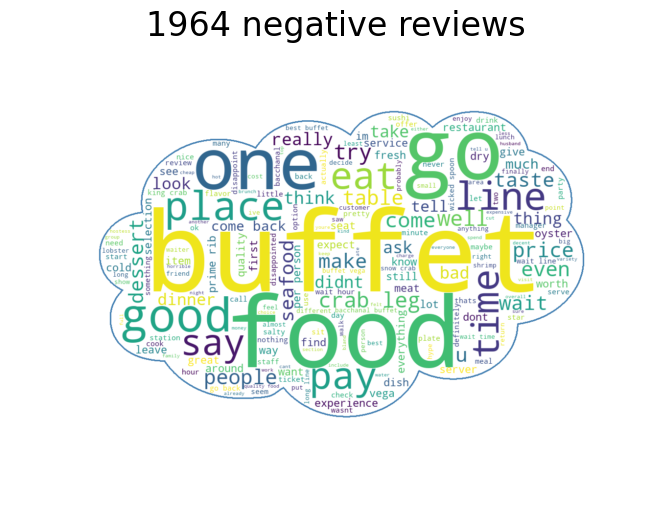

In [39]:
mask = np.array(Image.open("cloud.png"))
wc = WordCloud(width=600, height=600, background_color="white", stopwords=STOPWORDS, mask=mask, contour_width=3, contour_color="steelblue").generate(text)

plt.figure(figsize=(10,6)); 
plt.title(f"{(df['sentiment']=='negative').sum()} negative reviews", fontsize=24);
plt.imshow(wc, interpolation='bilinear'); 
plt.axis('off'); 
plt.show()

In [40]:
text = " ".join(df.loc[df["stars"] == 5, "clean_text"].astype(str))

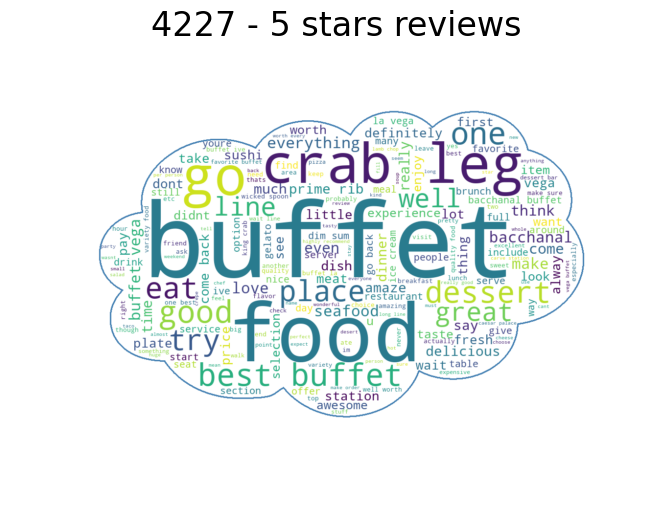

In [41]:
mask = np.array(Image.open("cloud.png"))
wc = WordCloud(width=600, height=600, background_color="white", stopwords=STOPWORDS, mask=mask, contour_width=3, contour_color="steelblue").generate(text)

plt.figure(figsize=(10,6)); 
plt.title(f"{(df['stars']==5).sum()} - 5 stars reviews", fontsize=24);
plt.imshow(wc, interpolation='bilinear'); 
plt.axis('off'); 
plt.show()

In [42]:
text = " ".join(df.loc[df["stars"] == 1, "clean_text"].astype(str))

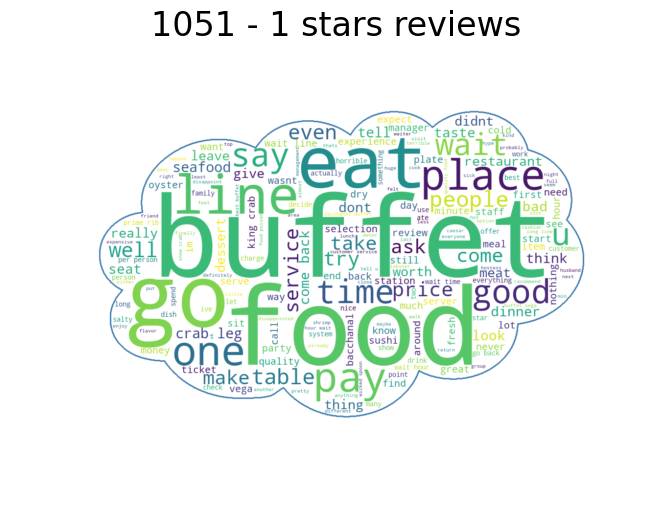

In [43]:
mask = np.array(Image.open("cloud.png"))
wc = WordCloud(width=600, height=600, background_color="white", stopwords=STOPWORDS, mask=mask, contour_width=3, contour_color="steelblue").generate(text)

plt.figure(figsize=(10,6)); 
plt.title(f"{(df['stars']==1).sum()} - 1 stars reviews", fontsize=24);
plt.imshow(wc, interpolation='bilinear'); 
plt.axis('off'); 
plt.show()

## Modelleme

Bu bölümde bir veya birden fazla model eğitilecektir. Örnekler:
- **MultinomialNB()**
- **BernoulliNB()**
- **DecisionTreeClassifier()**
- **LogisticRegression()**
- **GradientBoostingClassifier**

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [52]:
x = df["clean_text"]
y = df["sentiment"]

In [53]:
x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.95, stop_words="english")
x_train = tfidf.fit_transform(x_train_raw)   
x_test  = tfidf.transform(x_test_raw)

In [55]:
cv_bin = CountVectorizer(binary=True, ngram_range=(1,2), min_df=2, stop_words="english")
x_train_bin = cv_bin.fit_transform(x_train_raw)
x_test_bin  = cv_bin.transform(x_test_raw)

In [56]:
m = MultinomialNB()
b = BernoulliNB()

In [57]:
m.fit(x_train, y_train)

MultinomialNB()

In [58]:
mtahmin = m.predict(x_test)

In [59]:
accuracy_score(y_test, mtahmin)

0.6612048192771084

In [84]:
b.fit(x_train_bin, y_train)

BernoulliNB()

In [85]:
btahmin = b.predict(x_test_bin)

In [86]:
accuracy_score(y_test, btahmin)

0.6987951807228916

In [87]:
confusion_matrix(y_test, mtahmin)

array([[   1,    0,  392],
       [   0,    0,  311],
       [   0,    0, 1371]])

In [88]:
confusion_matrix(y_test, btahmin)

array([[ 121,   34,  238],
       [  22,   44,  245],
       [   6,   80, 1285]])

<Axes: >

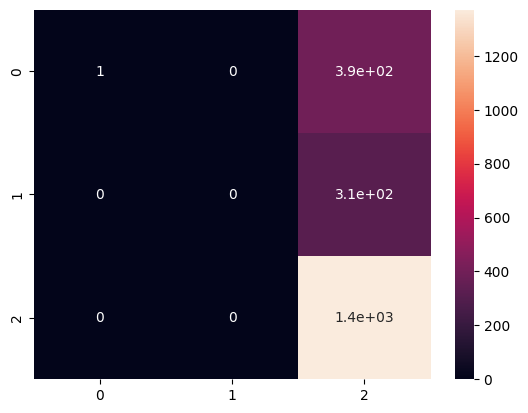

In [65]:
sns.heatmap(confusion_matrix(y_test, mtahmin), annot=True)

<Axes: >

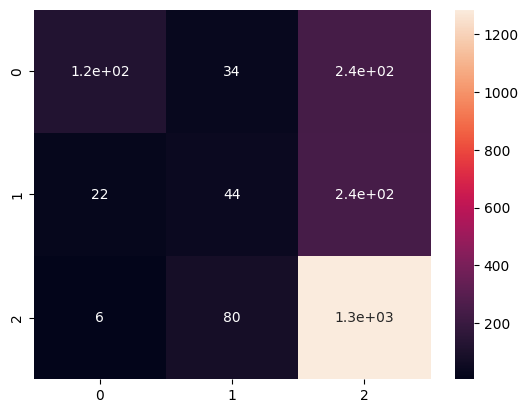

In [66]:
sns.heatmap(confusion_matrix(y_test, btahmin), annot=True)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
l = LogisticRegression()

In [69]:
l.fit(x_train, y_train)

LogisticRegression()

In [70]:
ltahmin = l.predict(x_test)

In [71]:
accuracy_score(y_test, ltahmin)

0.7927710843373494

<Axes: >

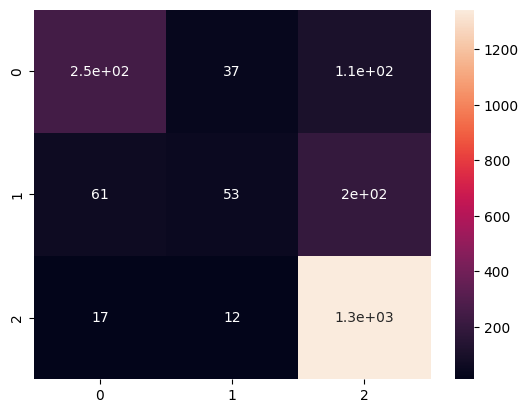

In [72]:
sns.heatmap(confusion_matrix(y_test, ltahmin), annot=True)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
d = DecisionTreeClassifier()

In [75]:
d.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
dtahmin = d.predict(x_test)

In [77]:
accuracy_score(y_test, dtahmin)

0.6616867469879518

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
h = GradientBoostingClassifier()

In [80]:
h.fit(x_train, y_train)

GradientBoostingClassifier()

In [81]:
htahmin = h.predict(x_test)

In [82]:
accuracy_score(y_test, htahmin)

0.7614457831325301

In [83]:
from sklearn.metrics import accuracy_score

results = {
    "MultinomialNB": accuracy_score(y_test, mtahmin),
    "BernoulliNB": accuracy_score(y_test, btahmin),
    "LogisticRegression": accuracy_score(y_test, ltahmin),
    "DecisionTree": accuracy_score(y_test, dtahmin),
    "GradientBoosting": accuracy_score(y_test, htahmin)
}

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

MultinomialNB: 0.6612
BernoulliNB: 0.6988
LogisticRegression: 0.7928
DecisionTree: 0.6617
GradientBoosting: 0.7614


In [90]:
from sklearn.metrics import f1_score

In [91]:
ybw = df[df["sentiment"].isin(["positive", "negative", "neutral"])]

In [92]:
ybw.reset_index(drop=True, inplace=True) #boş indexleri sıralıyor aradan çıkanları

In [93]:
ybw.sample()

,stars,useful,funny,cool,text,date,year,month,day,clean_text,language,sentiment
6619,5,1,0,1,No way can this buffet earn less than 5 star. ...,2018-03-25 14:09:31,2018,3,25,way buffet earn less 5 star favorite place eat...,en,positive


In [94]:
x = ybw['clean_text']
y = ybw['sentiment']

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
def ekkok(text):
    words = TextBlob(text).words
    return [word.lemmatize() for word in words] #eklerini kaldırıp köklerini bulma

In [97]:
vect = CountVectorizer(analyzer=ekkok)

In [98]:
from textblob import TextBlob

In [99]:
x = ybw['clean_text'].fillna('').astype(str)  
x_vec = vect.fit_transform(x) 

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.2, random_state=42, stratify=y)

In [101]:
lr = LogisticRegression(max_iter=200, class_weight="balanced")

In [102]:
model = lr.fit(x_train, y_train)

In [103]:
tahmin = lr.predict(x_test)

In [104]:
accuracy_score(tahmin, y_test)

0.7710843373493976

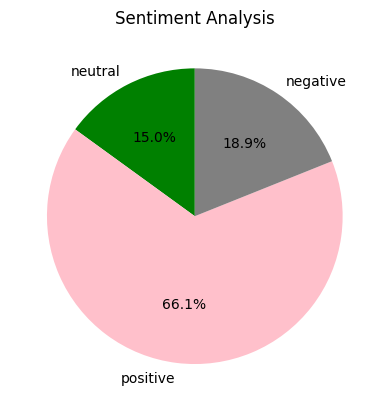

In [105]:
order   = ['neutral','positive','negative']
counts  = df['sentiment'].value_counts().reindex(order)
colors = ['green', 'pink', 'gray']
ax = counts.plot.pie(autopct='%1.1f%%', startangle=90,
                     colors=colors, ylabel='', title='Sentiment Analysis')
plt.show()

In [107]:
from textblob import TextBlob

In [108]:
ybw['polarity'] = ybw['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
ybw['subjectivity'] = ybw['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

In [109]:
ybw[['clean_text', 'polarity', 'subjectivity']].head()

,clean_text,polarity,subjectivity
0,get food poison palm hotel scar eat buffet fig...,0.292364,0.574606
1,feast worthy godsbaccarnal buffet caesar palac...,0.232393,0.545993
2,crab leg well one wicked spoon huge prawn shee...,-0.192424,0.753030
3,worth salty food expensive furst kast visit bu...,-0.100000,0.400000
4,would give infinite star could family diamond ...,0.412500,0.750000


In [110]:
#Calculating Pos, Neg, Neu, Compound

In [111]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [112]:
import nltk

In [113]:
nltk.download('punkt'); nltk.download('stopwords'); nltk.download('wordnet'); nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leyuz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leyuz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leyuz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\leyuz\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [114]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leyuz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [115]:
sia = SentimentIntensityAnalyzer()

In [116]:
ybw[['neg', 'neu', 'pos', 'compound']] = ybw['clean_text'].apply(lambda x: pd.Series(sia.polarity_scores(str(x))))

In [117]:
ybw[['clean_text', 'neg', 'neu', 'pos', 'compound']].head()

,clean_text,neg,neu,pos,compound
0,get food poison palm hotel scar eat buffet fig...,0.109,0.578,0.314,0.9729
1,feast worthy godsbaccarnal buffet caesar palac...,0.080,0.671,0.249,0.9985
2,crab leg well one wicked spoon huge prawn shee...,0.205,0.650,0.145,-0.7374
3,worth salty food expensive furst kast visit bu...,0.000,0.787,0.213,0.2263
4,would give infinite star could family diamond ...,0.055,0.727,0.218,0.8017
